<a href="https://colab.research.google.com/github/xwasanx/HomeEx/blob/main/facebook_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

# Facebook's Prophet Library

## Importing the Data

👇 Go to [trends.google.com](https://trends.google.com/trends/?geo=US) and retrieve the dataset representing the interest over time of the keyword `data science` since 2004 in the US. Once you get the dataset, import the data and display the first few rows

In [ ]:
from google.colab import auth
import pandas as pd

# Will collect your credentials
auth.authenticate_user()

# Query Bigquery
query = "SELECT created_at, count(*) as nb_exchanges FROM `homeex-420408.home_exchange.exchanges_cleaned` GROUP BY created_at"
project = "homeex-420408"

df = pd.read_gbq(query=query, project_id=project)

## Displaying the Data

👇Visualize the data by displaying the first few rows of the dataframe

In [ ]:
df

,created_at,nb_exchanges
0,2022-07-12,12823
1,2022-09-29,11026
2,2022-03-24,15296
3,2022-05-08,20371
4,2019-08-26,5018
...,...,...
1420,2019-01-03,168
1421,2020-03-30,522
1422,2020-04-07,611
1423,2020-03-17,691


## Data Preprocessing

Facebook's Prophet library requires the data to be in a specific format

👇 Format the dataset as per Facebook Prophet's requirements. Remember, the DataFrame should have both a `ds` and a `y` column.

In [ ]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

df.head()

,ds,y
0,2022-07-12,12823
1,2022-09-29,11026
2,2022-03-24,15296
3,2022-05-08,20371
4,2019-08-26,5018


In [ ]:
df.sort_values(by='ds', inplace=True)
df.set_index('ds')

,y
ds,
2019-01-01,132
2019-01-02,217
2019-01-03,168
2019-01-04,382
2019-01-05,336
...,...
2022-11-21,11969
2022-11-22,11387
2022-11-23,11170


In [ ]:
df=df.set_index('ds').resample('M').sum()


,ds,y
0,2019-01-31,44388
1,2019-02-28,74730
2,2019-03-31,118685
3,2019-04-30,121745
4,2019-05-31,135947
5,2019-06-30,126411
6,2019-07-31,148054
7,2019-08-31,142589
8,2019-09-30,166341
9,2019-10-31,185683


In [ ]:
df.reset_index(inplace=True)
df

,ds,y
0,2019-01-31,44388
1,2019-02-28,74730
2,2019-03-31,118685
3,2019-04-30,121745
4,2019-05-31,135947
5,2019-06-30,126411
6,2019-07-31,148054
7,2019-08-31,142589
8,2019-09-30,166341
9,2019-10-31,185683


## Plotting the Data

👇 Plot the data

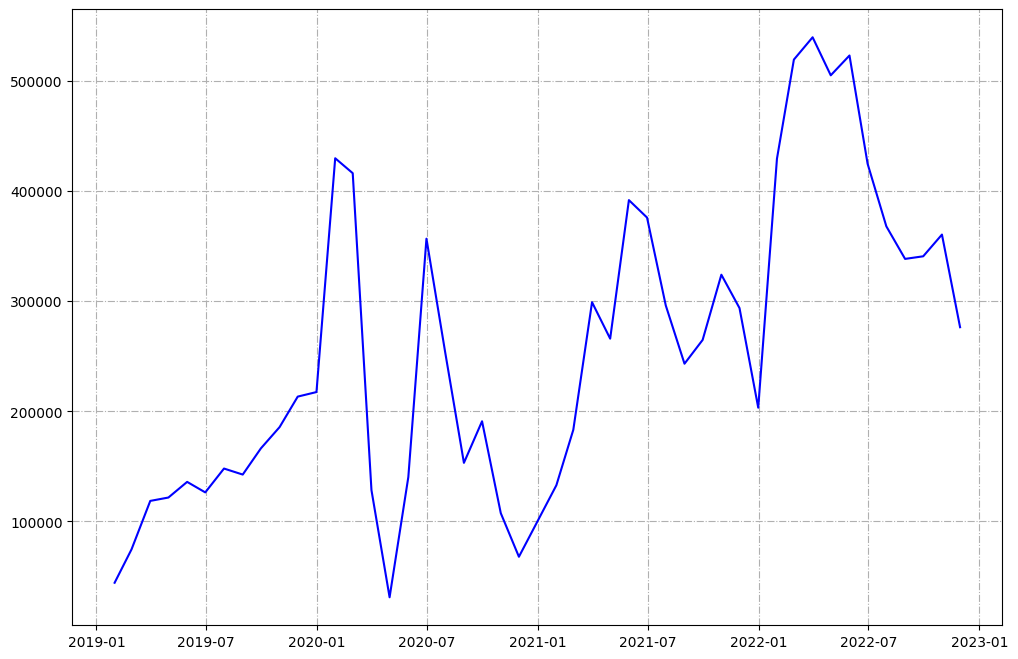

In [ ]:
plt.figure(figsize=(12, 8))
plt.grid(linestyle='-.')

plt.plot(df['ds'], df['y'], 'b')
plt.show()

## Fitting the Data

👇 Fit the data using Facebook's Prophet library. Make sure to use a train/test split.

In [ ]:
train = df.iloc[:38]
test = df.iloc[38:]

In [ ]:
train.shape, test.shape

((38, 2), (9, 2))

In [ ]:
train

,ds,y
0,2019-01-31,44388
1,2019-02-28,74730
2,2019-03-31,118685
3,2019-04-30,121745
4,2019-05-31,135947
5,2019-06-30,126411
6,2019-07-31,148054
7,2019-08-31,142589
8,2019-09-30,166341
9,2019-10-31,185683


In [ ]:
# model = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
model = Prophet()
model.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ixy68q4/kuu79ye6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ixy68q4/v9jrqh5c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79619', 'data', 'file=/tmp/tmp5ixy68q4/kuu79ye6.json', 'init=/tmp/tmp5ixy68q4/v9jrqh5c.json', 'output', 'file=/tmp/tmp5ixy68q4/prophet_modeln09pvxgi/prophet_model-20240423083758.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:37:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:37:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Make Future Predictions

👇Before predicting future values with Facebook's Prophet library, you first need to create a placeholder DataFrame that will eventually hold the predictions. Once you create the DataFrame, try to predict 2 years in the future.

You can create the predictions DataFrame using `make_future_dataframe()`

In [ ]:
horizon = 9
future = model.make_future_dataframe(periods=horizon, freq='MS')

forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
42,2022-07-01,581273.748812,490606.625422,673526.799000
43,2022-08-01,420985.151359,327238.361510,510323.554363
44,2022-09-01,316637.783448,225537.352439,404246.746780
45,2022-10-01,415477.289330,330493.084836,514199.639869
46,2022-11-01,382622.711613,289341.515076,472417.057107


## Plotting the Forecast

👇 It's time to visualize our forecast. Try to first plot it using [`model.plot(forecast)`](https://facebook.github.io/prophet/docs/quick_start.html)

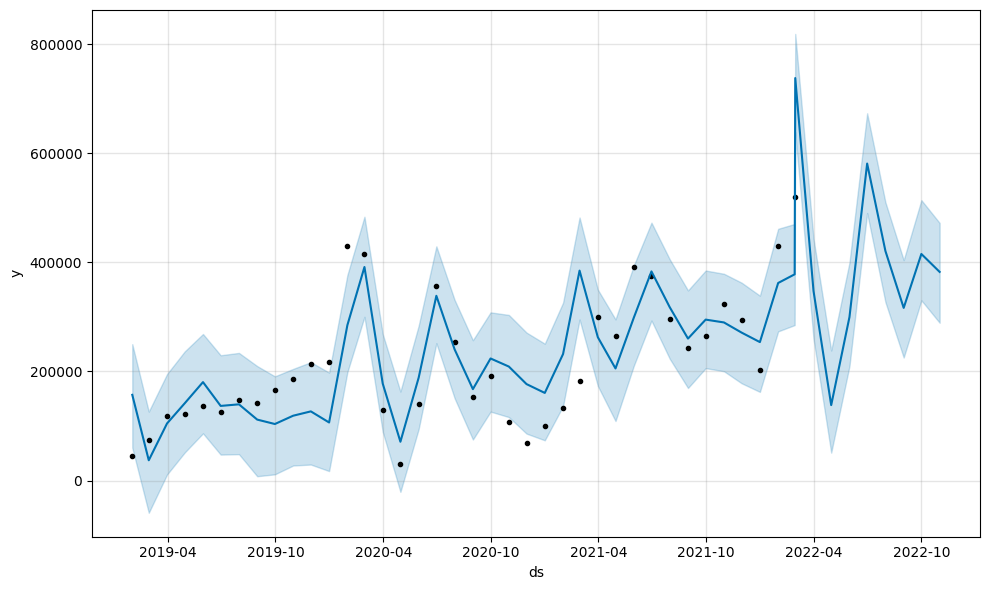

In [ ]:
ax = model.plot(forecast);

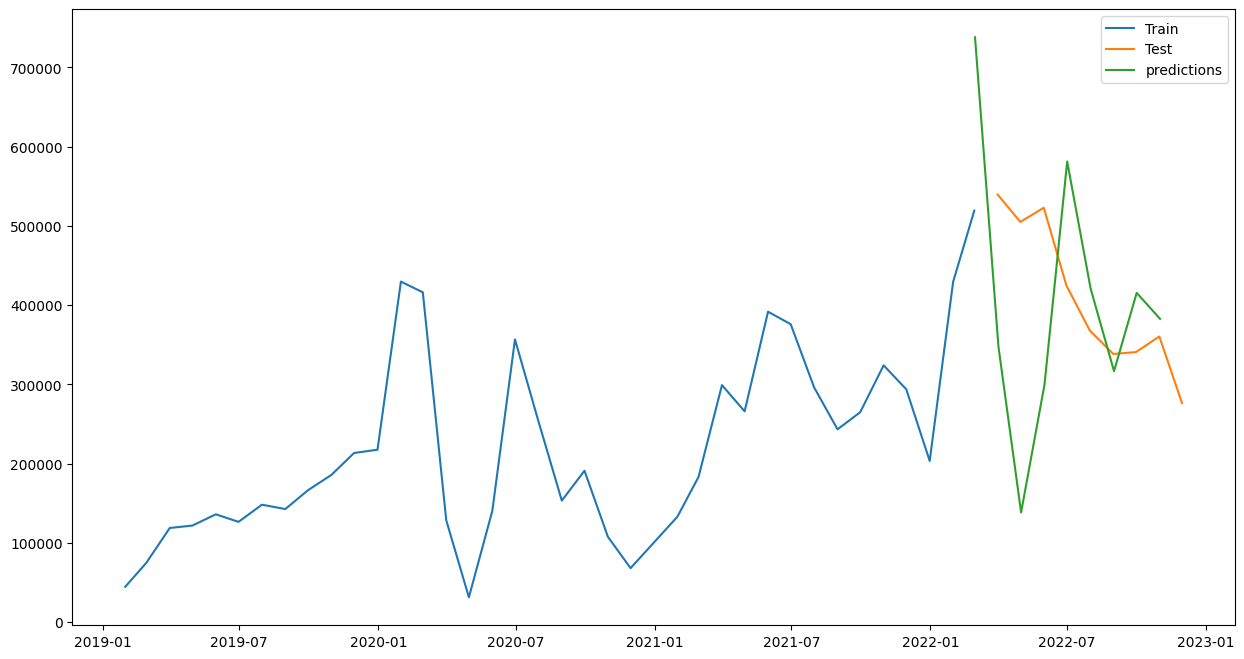

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(train['ds'], train['y'], label="Train")
plt.plot(test['ds'], test['y'], label="Test")
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="predictions")
plt.legend(loc="best")
plt.show()

👉 From 2004 to 2018 we can see the train data, as well as the forecasted data from 2018 to 2020.

We can also notice a shaded region behind the plot which represents the 95% uncertainty interval.

The black dots represent the original data

## Time Series' Trend and Seasonality

👇 Plot the trend and yearly seasonality of the Time Series. This can be done using the `plot_components()` function from Facebook's Prophet Library

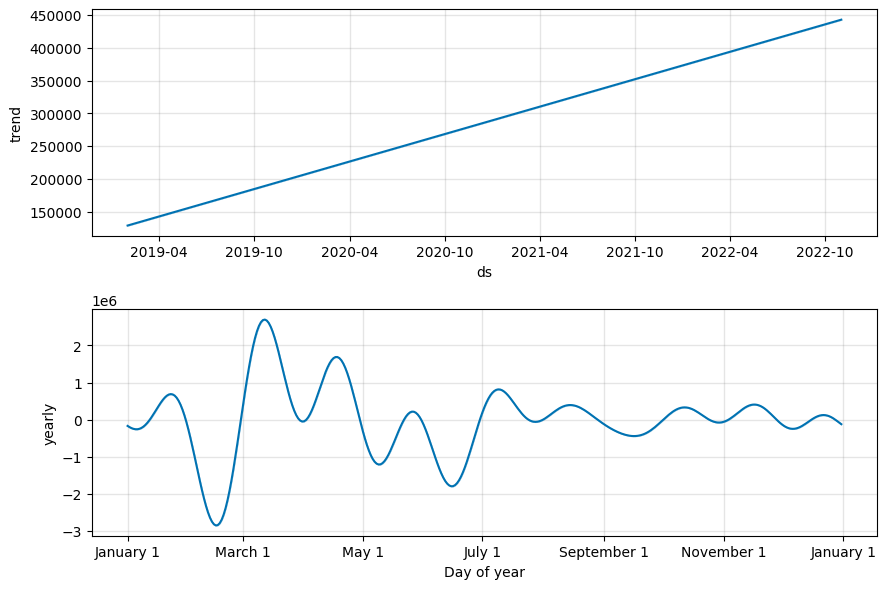

In [ ]:
model.plot_components(forecast);

## Evaluating the Model with Cross-Validation!

👇 Using `cross_validation()` and `performance_metrics()` from [prophet.diagnostics](https://facebook.github.io/prophet/docs/diagnostics.html), evaluate the performance of your model

More precisely, create a Time Series K-fold CV with
- train sets of size 5 years
- horizon val sizes of 1 year
- shifting each fold by 180 days

<img src="https://wagon-public-datasets.s3-eu-west-1.amazonaws.com/05-Machine-Learning/09-Time-Series/prophet_train_test_split.png" width=850>

In [ ]:
# cv_results = cross_validation(model=model, initial=f'{365 * 5} days', horizon='365 days', period='180 days')
# cv_results

In [ ]:
# df_p = performance_metrics(cv_results)
# df_p

In [ ]:
# # Plot results below
# plot_cross_validation_metric(cv_results, metric='mape');

⚠️ Don't forget to push the challenge to GitHub once you're done 😄

## Actual Prediction

In [ ]:
# model = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
model = Prophet()
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ixy68q4/jxb0_p_f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ixy68q4/cm4zfswy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85220', 'data', 'file=/tmp/tmp5ixy68q4/jxb0_p_f.json', 'init=/tmp/tmp5ixy68q4/cm4zfswy.json', 'output', 'file=/tmp/tmp5ixy68q4/prophet_modela6tv98lj/prophet_model-20240423084409.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:44:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:44:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
horizon = 36
future = model.make_future_dataframe(periods=horizon, freq='MS')

forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
78,2025-07-01,928084.732204,831928.424217,1.025480e+06
79,2025-08-01,725681.182466,634351.666136,8.233227e+05
80,2025-09-01,585943.346817,495469.374241,6.740572e+05
81,2025-10-01,694678.295691,588513.449583,7.867728e+05
82,2025-11-01,646432.429708,554105.680610,7.416358e+05


In [ ]:
df

,ds,y
0,2019-01-31,44388
1,2019-02-28,74730
2,2019-03-31,118685
3,2019-04-30,121745
4,2019-05-31,135947
5,2019-06-30,126411
6,2019-07-31,148054
7,2019-08-31,142589
8,2019-09-30,166341
9,2019-10-31,185683


In [ ]:
result=forecast[['ds','yhat']]
result

,ds,yhat
0,2019-01-31,144684.011547
1,2019-02-28,13137.893570
2,2019-03-31,151965.951629
3,2019-04-30,177513.932674
4,2019-05-31,199836.519616
...,...,...
78,2025-07-01,928084.732204
79,2025-08-01,725681.182466
80,2025-09-01,585943.346817
81,2025-10-01,694678.295691


In [ ]:
result['actual']=None
result

<ipython-input-47-5f8e7ac65551>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['actual']=None


,ds,yhat,actual
0,2019-01-31,144684.011547,None
1,2019-02-28,13137.893570,None
2,2019-03-31,151965.951629,None
3,2019-04-30,177513.932674,None
4,2019-05-31,199836.519616,None
...,...,...,...
78,2025-07-01,928084.732204,None
79,2025-08-01,725681.182466,None
80,2025-09-01,585943.346817,None
81,2025-10-01,694678.295691,None


In [ ]:
result.loc[:46,'actual']=df['y']
result

,ds,yhat,actual
0,2019-01-31,144684.011547,44388
1,2019-02-28,13137.893570,74730
2,2019-03-31,151965.951629,118685
3,2019-04-30,177513.932674,121745
4,2019-05-31,199836.519616,135947
...,...,...,...
78,2025-07-01,928084.732204,None
79,2025-08-01,725681.182466,None
80,2025-09-01,585943.346817,None
81,2025-10-01,694678.295691,None


In [ ]:
result.to_gbq('homeex-420408.home_exchange.prophet_prediction',project_id='homeex-420408',if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 8738.13it/s]


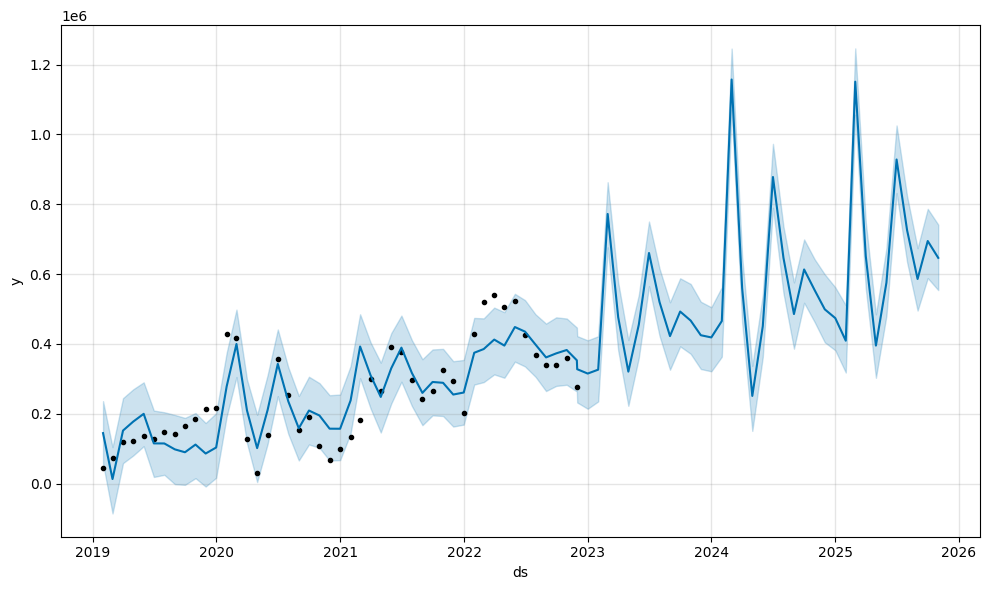

In [ ]:
ax = model.plot(forecast);